# Introdu√ß√£o

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv('/content/telexomX_BR_1.csv')
df.head()

customerID       Churn customer.gender  customer.SeniorCitizen  \
0  0002-ORFBO  Permaneceu          Female                       0   
1  0003-MKNFE  Permaneceu            Male                       0   
2  0004-TLHLJ        Saiu            Male                       0   
3  0011-IGKFF        Saiu            Male                       1   
4  0013-EXCHZ        Saiu          Female                       1   

   customer.Partner  customer.Dependents  customer.tenure  phone.PhoneService  \
0                 1                    1                9                   1   
1                 0                    0                9                   1   
2                 0                    0                4                   1   
3                 1                    0               13                   1   
4                 1                    0                3                   1   

  phone.MultipleLines internet.InternetService  ... internet.OnlineBackup  \
0                   0                      DSL  ...                     1   
1                   1                      DSL  ...                     0   
2                   0              Fiber optic  ...                     0   
3                   0              Fiber optic  ...                     1   
4                   0              Fiber optic  ...                     0   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                         0                    1                    1   
1                         0                    0                    0   
2                         1                    0                    0   
3                         1                    0                    1   
4                         0                    1                    1   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                        0         One year                        1   
1                        1   Month-to-month                        0   
2                        0   Month-to-month                        1   
3                        1   Month-to-month                        1   
4                        0   Month-to-month                        1   

   account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0           Mailed check                    65.6                 593.30  
1           Mailed check                    59.9                 542.40  
2       Electronic check                    73.9                 280.85  
3       Electronic check                    98.0                1237.85  
4           Mailed check                    83.9                 267.40  

[5 rows x 21 columns]

# Remo√ß√£o de Colunas Irrelevantes

In [2]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [3]:
# Verificar colunas com valor √∫nico (sem varia√ß√£o)
unicas = [col for col in df.columns if df[col].nunique() == 1]

# Verificar colunas com 100% de valores ausentes
ausentes = [col for col in df.columns if df[col].isna().sum() == df.shape[0]]

# Verificar colunas que s√£o identificadores
identificadores = [col for col in df.columns if 'id' in col.lower()]

# Juntar tudo
colunas_inuteis = list(set(unicas + ausentes + identificadores))

# Mostrar as colunas identificadas
print("Colunas consideradas in√∫teis para a modelagem:")
for col in colunas_inuteis:
    print(f" - {col}")
df.drop(columns=colunas_inuteis, inplace=True)

Colunas consideradas in√∫teis para a modelagem:
 - customerID


In [4]:
df.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

# Verifica√ß√£o da Propor√ß√£o de Evas√£o

In [5]:
# Verificar distribui√ß√£o da vari√°vel-alvo
proporcao_churn = df['Churn'].value_counts(normalize=True)

# Exibir como percentual
print("üìä Propor√ß√£o de clientes:")
print(proporcao_churn.map(lambda x: f"{x:.2%}"))

üìä Propor√ß√£o de clientes:
Churn
Permaneceu    73.46%
Saiu          26.54%
Name: proportion, dtype: object


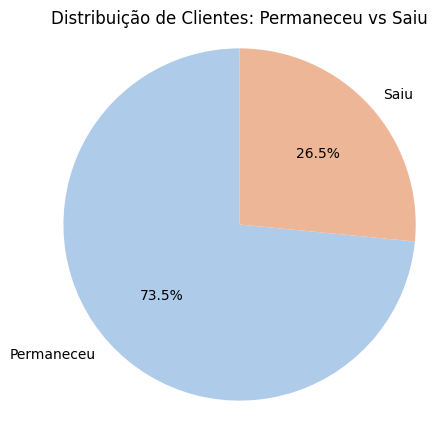

In [6]:
labels = df['Churn'].value_counts().index
sizes = df['Churn'].value_counts().values
colors = ['#aecbe9' if label == 'Permaneceu' else '#ecb697' for label in labels]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribui√ß√£o de Clientes: Permaneceu vs Saiu')
plt.axis('equal')
plt.show()


In [7]:
df['Churn'] = df['Churn'].map({'Permaneceu': 0, 'Saiu': 1})
df

Churn customer.gender  customer.SeniorCitizen  customer.Partner  \
0         0          Female                       0                 1   
1         0            Male                       0                 0   
2         1            Male                       0                 0   
3         1            Male                       1                 1   
4         1          Female                       1                 1   
...     ...             ...                     ...               ...   
7038      0          Female                       0                 0   
7039      1            Male                       0                 1   
7040      0            Male                       0                 0   
7041      0            Male                       0                 1   
7042      0            Male                       0                 1   

      customer.Dependents  customer.tenure  phone.PhoneService  \
0                       1                9                   1   
1                       0                9                   1   
2                       0                4                   1   
3                       0               13                   1   
4                       0                3                   1   
...                   ...              ...                 ...   
7038                    0               13                   1   
7039                    0               22                   1   
7040                    0                2                   1   
7041                    1               67                   1   
7042                    1               63                   0   

     phone.MultipleLines internet.InternetService internet.OnlineSecurity  \
0                      0                      DSL                       0   
1                      1                      DSL                       0   
2                      0              Fiber optic                       0   
3                      0              Fiber optic                       0   
4                      0              Fiber optic                       0   
...                  ...                      ...                     ...   
7038                   0                      DSL                       1   
7039                   1              Fiber optic                       0   
7040                   0                      DSL                       0   
7041                   0                      DSL                       1   
7042    No phone service                      DSL                       1   

     internet.OnlineBackup internet.DeviceProtection internet.TechSupport  \
0                        1                         0                    1   
1                        0                         0                    0   
2                        0                         1                    0   
3                        1                         1                    0   
4                        0                         0                    1   
...                    ...                       ...                  ...   
7038                     0                         0                    1   
7039                     0                         0                    0   
7040                     1                         0                    0   
7041                     0                         1                    1   
7042                     1                         1                    0   

     internet.StreamingTV internet.StreamingMovies account.Contract  \
0                       1                        0         One year   
1                       0                        1   Month-to-month   
2                       0                        0   Month-to-month   
3                       1                        1   Month-to-month   
4                       1                        0   Month-to-month   
...                   ...                      ...          

In [8]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
x_train_encoded = pd.get_dummies(x_train)
x_test_encoded = pd.get_dummies(x_test)
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='inner', axis=1, fill_value=0)
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_encoded, y_train)

print("Formato dos dados de treinamento originais: ", x_train.shape)
print("Formato dos dados de treinamento balanceados: ", x_train_smote.shape)
print("Formato dos r√≥tulos de treinamento originais: ", y_train.shape)
print("Formato dos r√≥tulos de treinamento balanceados: ", y_train_smote.shape)


Formato dos dados de treinamento originais:  (5634, 19)
Formato dos dados de treinamento balanceados:  (8278, 41)
Formato dos r√≥tulos de treinamento originais:  (5634,)
Formato dos r√≥tulos de treinamento balanceados:  (8278,)


# Verificando Normaliza√ß√£o ou Padroniza√ß√£o

In [11]:
col_numericas = x_train_encoded.select_dtypes(include=['int64', 'float64']).columns
col_numericas

Index(['customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
       'customer.tenure', 'phone.PhoneService', 'account.PaperlessBilling',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [12]:
# Criar o scaler e ajustar apenas nos dados de treino
scaler = StandardScaler()
x_train_encoded_scaled = x_train_encoded.copy()
x_test_encoded_scaled = x_test_encoded.copy()

x_train_encoded_scaled[col_numericas] = scaler.fit_transform(x_train_encoded[col_numericas])
x_test_encoded_scaled[col_numericas] = scaler.transform(x_test_encoded[col_numericas])

# An√°lise de Correla√ß√£o

In [13]:
df_numerico = df.select_dtypes(include=['int64', 'float64'])
correlacao = df_numerico.corr()

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de Correla√ß√£o', fontsize=16, weight='bold', color='steelblue')
plt.xticks(rotation=45)
plt.show()

In [15]:
corr_churn = correlacao['Churn'].drop('Churn')
corr_ordenada = corr_churn.abs().sort_values(ascending=False)
print(f'Colunas mais correlacionadas com churn:\n{corr_ordenada}')

Colunas mais correlacionadas com churn:
customer.tenure             0.352229
account.Charges.Total       0.199034
account.Charges.Monthly     0.193356
account.PaperlessBilling    0.191825
customer.Dependents         0.164221
customer.SeniorCitizen      0.150889
customer.Partner            0.150448
phone.PhoneService          0.011942
Name: Churn, dtype: float64


In [16]:
limiar = 0.2
var_select = corr_ordenada[corr_ordenada.abs() >= limiar].index.tolist()
print(f'Vari√°veis selecionadas com base na correla√ß√£o: {var_select}')

Vari√°veis selecionadas com base na correla√ß√£o: ['customer.tenure']


In [17]:
x_train_corr = x_train_encoded_scaled[var_select]
x_test_corr = x_test_encoded_scaled[var_select]
x_train_corr_sem_escala = x_train_encoded[var_select]
x_test_corr_sem_escala = x_test_encoded[var_select]

# An√°lises Direcionadas

/tmp/ipython-input-18-3263613905.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='customer.tenure',


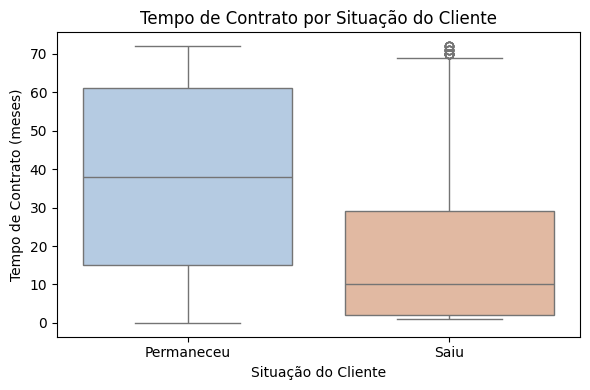

In [18]:
df['Churn'] = df['Churn'].replace({0: 'Permaneceu', 1: 'Saiu'})
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='customer.tenure',
            palette={'Permaneceu': '#aecbe9', 'Saiu': '#ecb697'})
plt.title('Tempo de Contrato por Situa√ß√£o do Cliente')
plt.xlabel('Situa√ß√£o do Cliente')
plt.ylabel('Tempo de Contrato (meses)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-19-4241781673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='account.Charges.Total',


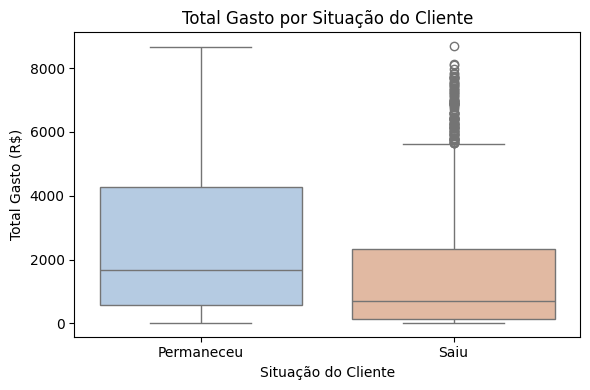

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='account.Charges.Total',
            palette={'Permaneceu': '#aecbe9', 'Saiu': '#ecb697'})
plt.title('Total Gasto por Situa√ß√£o do Cliente')
plt.xlabel('Situa√ß√£o do Cliente')
plt.ylabel('Total Gasto (R$)')
plt.tight_layout()
plt.show()


In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,
                x='customer.tenure',
                y='account.Charges.Total',
                hue='Churn',
                palette={'Permaneceu': '#aecbe9', 'Saiu': '#ecb697'},
                alpha=0.6)
plt.title('Tempo de Contrato vs Total Gasto')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Situa√ß√£o do Cliente')
plt.tight_layout()
plt.show()


# Cria√ß√£o de Modelos

In [21]:
# Separar vari√°vel-alvo e preditores
X = df.drop(columns='Churn')
y = df['Churn']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# --- Modelo 1: Regress√£o Log√≠stica (com normaliza√ß√£o) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train_scaled, y_train)
y_pred_log = modelo_log.predict(X_test_scaled)

print("Regress√£o Log√≠stica:")
print(classification_report(y_test, y_pred_log))

# --- Modelo 2: Random Forest (sem normaliza√ß√£o) ---
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# --- Modelo 3: KNN ---
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Treinar com os dados normalizados
modelo_knn.fit(X_train_scaled, y_train)

# Previs√£o (opcional)
y_pred_knn = modelo_knn.predict(X_test_scaled)

# Relat√≥rio completo (opcional, mostra precis√£o, recall, f1 por classe)
print("\nRelat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred_knn))


# --- Modelo 4: SVM com kernel linear ---
modelo_svm = SVC(kernel='linear', random_state=42)
modelo_svm.fit(X_train_scaled, y_train)

# Fazer a predi√ß√£o
y_pred_svm = modelo_svm.predict(X_test_scaled)

# Gerar o relat√≥rio de classifica√ß√£o
print("Relat√≥rio de Classifica√ß√£o - SVM Linear:")
print(classification_report(y_test, y_pred_svm))



Regress√£o Log√≠stica:
              precision    recall  f1-score   support

  Permaneceu       0.84      0.89      0.87      1552
        Saiu       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Random Forest:
              precision    recall  f1-score   support

  Permaneceu       0.83      0.89      0.86      1552
        Saiu       0.62      0.49      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.78      2113


Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

  Permaneceu       0.82      0.83      0.83      1552
        Saiu       0.52      0.51      0.51       561

    accuracy                           0.74      2113
   macro avg       0.67      0.67      0.67      2113
weig

Avalia√ß√£o dos Modelos

In [22]:
# --- Compara√ß√£o das M√©tricas ---
from sklearn.metrics import precision_score, recall_score

# Fun√ß√£o para calcular as m√©tricas macro
def avaliar_modelo(nome, y_true, y_pred):
    return {
        'Modelo': nome,
        'Acur√°cia': accuracy_score(y_true, y_pred),
        'F1-score (macro)': f1_score(y_true, y_pred, average='macro'),
        'Precis√£o (macro)': precision_score(y_true, y_pred, average='macro'),
        'Recall (macro)': recall_score(y_true, y_pred, average='macro')
    }

# Avaliar cada modelo
resultados = [
    avaliar_modelo("Regress√£o Log√≠stica", y_test, y_pred_log),
    avaliar_modelo("Random Forest", y_test, y_pred_rf),
    avaliar_modelo("KNN", y_test, y_pred_knn),
    avaliar_modelo("SVM Linear", y_test, y_pred_svm)
]

# Criar DataFrame
df_resultados = pd.DataFrame(resultados)

# Exibir a tabela
print("\nüìä Compara√ß√£o das M√©tricas de Avalia√ß√£o:")
print(df_resultados.sort_values(by="F1-score (macro)", ascending=False).round(4))



üìä Compara√ß√£o das M√©tricas de Avalia√ß√£o:
                Modelo  Acur√°cia  F1-score (macro)  Precis√£o (macro)  \
0  Regress√£o Log√≠stica    0.7974            0.7267            0.7415   
3           SVM Linear    0.7913            0.7200            0.7324   
1        Random Forest    0.7847            0.7030            0.7240   
2                  KNN    0.7444            0.6697            0.6712   

   Recall (macro)  
0          0.7164  
3          0.7111  
1          0.6907  
2          0.6684  


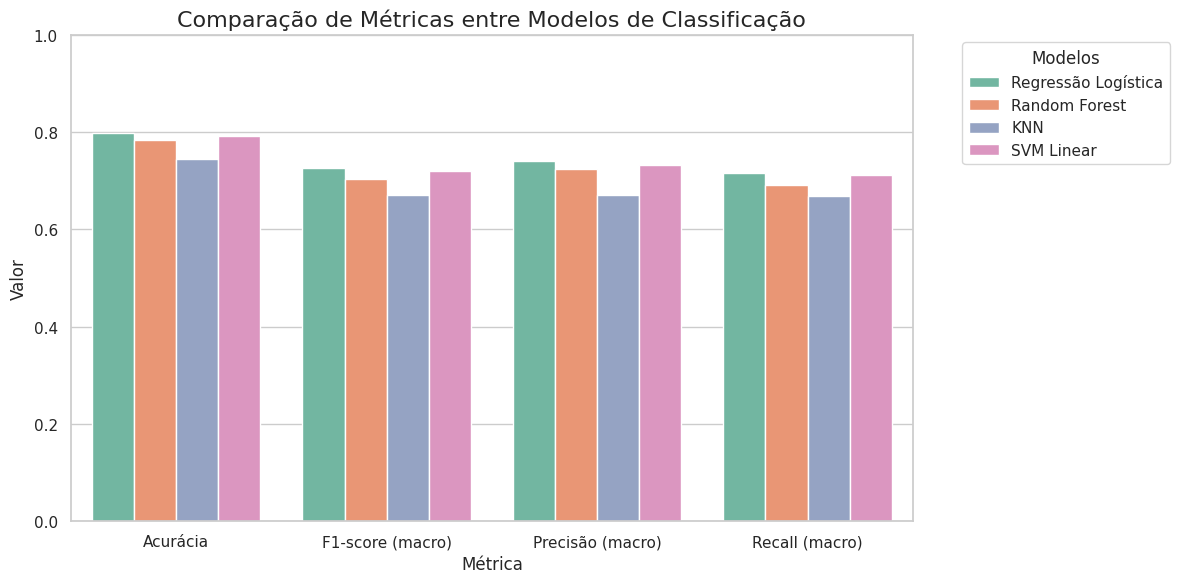

In [23]:
# Estilo do gr√°fico
sns.set(style="whitegrid")

# Reorganizar o DataFrame para formato longo (ideal para seaborn)
df_melted = df_resultados.melt(id_vars="Modelo", var_name="M√©trica", value_name="Valor")

# Gr√°fico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="M√©trica", y="Valor", hue="Modelo", palette="Set2")

plt.title("Compara√ß√£o de M√©tricas entre Modelos de Classifica√ß√£o", fontsize=16)
plt.ylim(0, 1)
plt.legend(title="Modelos", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# An√°lise de Import√¢ncia das Vari√°veis

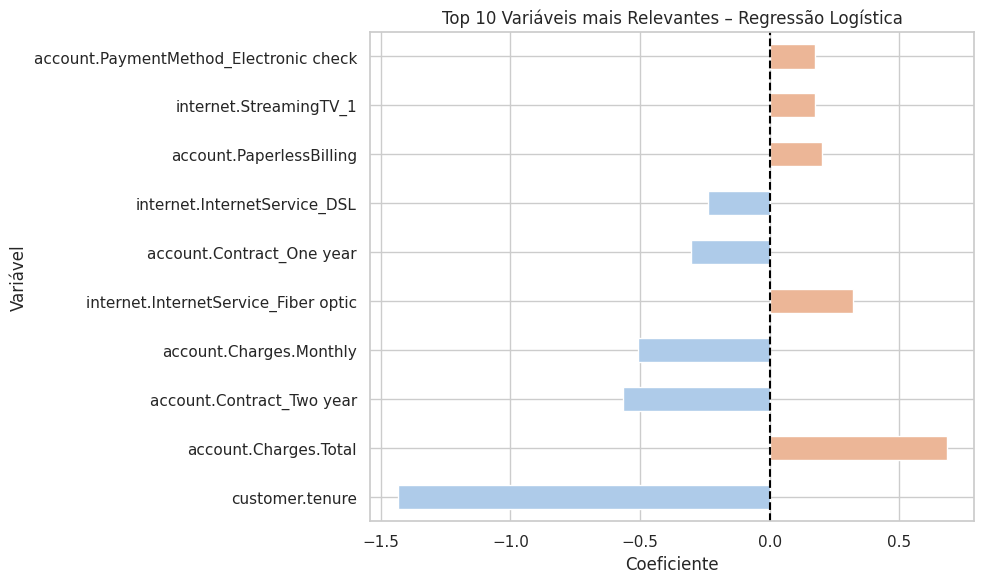

In [24]:
# Lista das colunas usadas no modelo (one-hot encoded)
colunas_modelo = X_train.columns  # J√° tem as 30 colunas

# Coeficientes do modelo
coeficientes = pd.Series(modelo_log.coef_[0], index=colunas_modelo)

# Ordenar por magnitude (absoluto)
coef_ordenados = coeficientes.sort_values(key=abs, ascending=False)

# Visualizar os 10 mais influentes
plt.figure(figsize=(10, 6))
coef_ordenados.head(10).plot(kind='barh', color=['#ecb697' if v > 0 else '#aecbe9' for v in coef_ordenados.head(10)])
plt.title('Top 10 Vari√°veis mais Relevantes ‚Äì Regress√£o Log√≠stica')
plt.xlabel('Coeficiente')
plt.ylabel('Vari√°vel')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


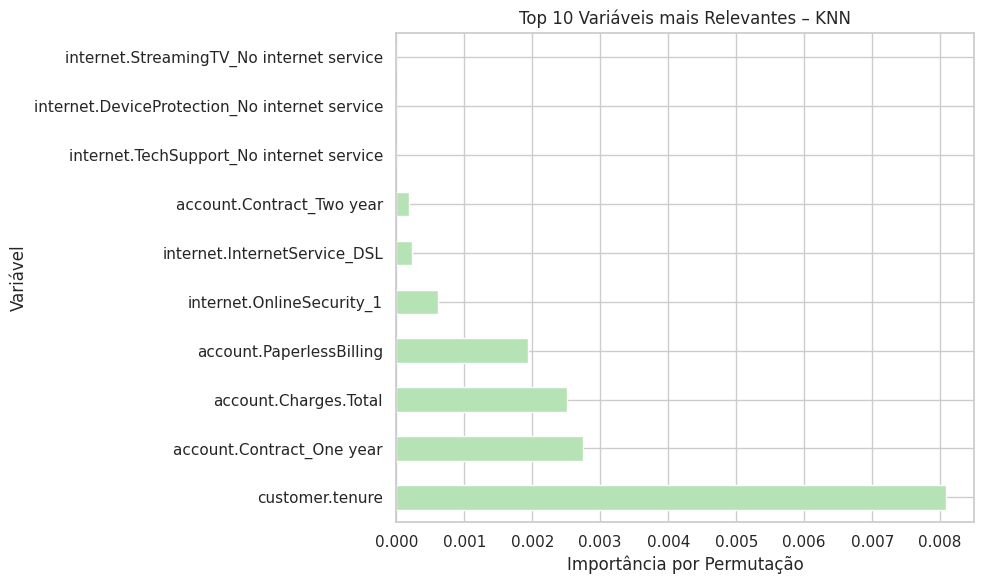

In [25]:
# Import√¢ncia por permuta√ß√£o
resultado_knn = permutation_importance(modelo_knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Converter em Series e ordenar
importancias_knn = pd.Series(resultado_knn.importances_mean, index=X_train.columns).sort_values(ascending=False)

# Visualizar os 10 principais
plt.figure(figsize=(10,6))
importancias_knn.head(10).plot(kind='barh', color='#b5e3b5')
plt.title('Top 10 Vari√°veis mais Relevantes ‚Äì KNN')
plt.xlabel('Import√¢ncia por Permuta√ß√£o')
plt.ylabel('Vari√°vel')
plt.tight_layout()
plt.show()


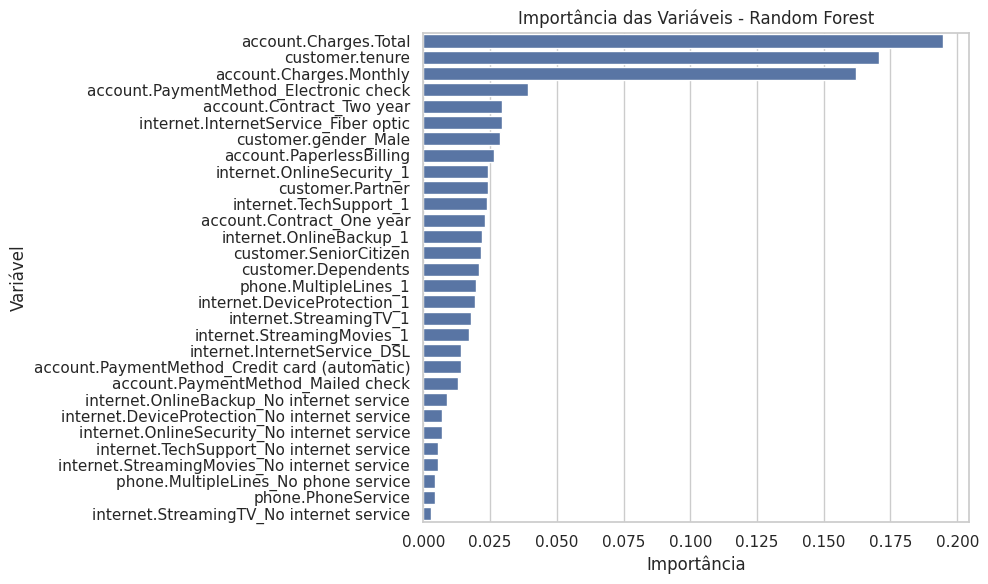

In [26]:
# Extrair as import√¢ncias
importancias = modelo_rf.feature_importances_

# Como voc√™ aplicou get_dummies, os nomes das colunas podem ter mudado:
colunas = X_train.columns

# Criar um DataFrame para facilitar a visualiza√ß√£o
df_importancias = pd.DataFrame({
    'Vari√°vel': colunas,
    'Import√¢ncia': importancias
})

# Ordenar da maior para a menor import√¢ncia
df_importancias = df_importancias.sort_values(by='Import√¢ncia', ascending=False)

# Plotar
plt.figure(figsize=(10,6))
sns.barplot(x='Import√¢ncia', y='Vari√°vel', data=df_importancias)
plt.title('Import√¢ncia das Vari√°veis - Random Forest')
plt.tight_layout()
plt.show()


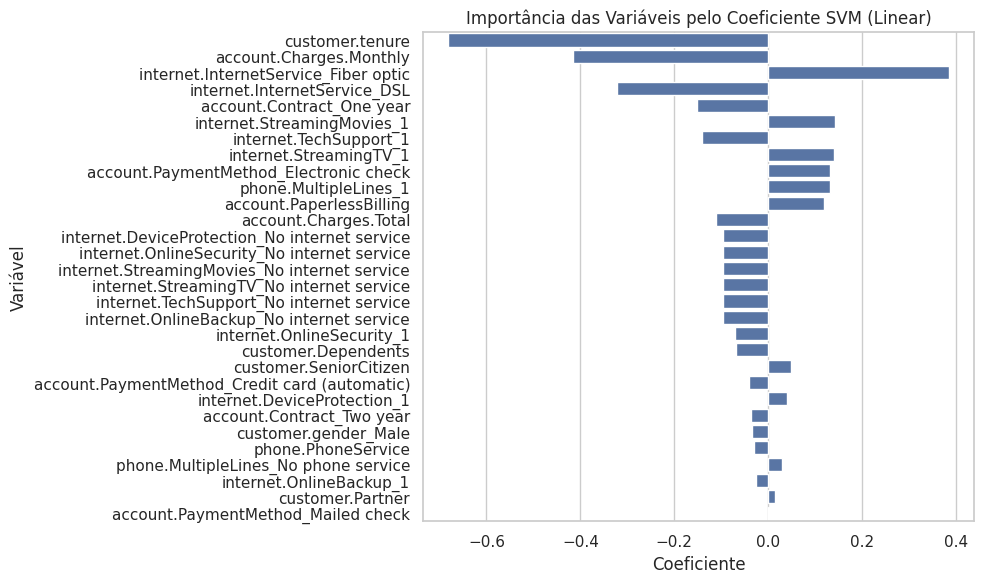

In [27]:
# Coeficientes das vari√°veis (forma: [1, n_features])
coeficientes = modelo_svm.coef_[0]

# Obter nomes das vari√°veis
colunas = X_train.columns

# Criar DataFrame com os coeficientes e vari√°veis
df_coef = pd.DataFrame({
    'Vari√°vel': colunas,
    'Coeficiente': coeficientes
})

# Calcular o valor absoluto para ordena√ß√£o
df_coef['AbsCoef'] = df_coef['Coeficiente'].abs()

# Ordenar pelo valor absoluto
df_coef = df_coef.sort_values(by='AbsCoef', ascending=False)

# Plotar
plt.figure(figsize=(10,6))
sns.barplot(x='Coeficiente', y='Vari√°vel', data=df_coef)
plt.title('Import√¢ncia das Vari√°veis pelo Coeficiente SVM (Linear)')
plt.tight_layout()
plt.show()


# Conclus√£o:

## Relat√≥rio Detalhado sobre Evas√£o de Clientes

Este relat√≥rio sumariza as descobertas da an√°lise explorat√≥ria de dados e dos modelos de machine learning treinados para prever a evas√£o de clientes. O objetivo √© identificar os principais fatores de risco e propor estrat√©gias eficazes de reten√ß√£o.

### 1. An√°lise de Correla√ß√£o e Import√¢ncia das Vari√°veis

A an√°lise de correla√ß√£o e a import√¢ncia das vari√°veis (obtida dos modelos) revelaram insights importantes sobre quais fatores est√£o mais associados √† evas√£o:

*   **Tempo de Contrato (`customer.tenure`):** Esta foi consistentemente uma das vari√°veis mais importantes em todos os modelos. Clientes com menor tempo de contrato (novos clientes) tendem a ter uma probabilidade maior de evas√£o. O boxplot demonstrou claramente essa diferen√ßa.
*   **Total Gasto (`account.Charges.Total`):** Embora menos correlacionado que o tempo de contrato, o total gasto tamb√©m apareceu como um fator relevante, especialmente no modelo Random Forest. Clientes com gastos totais menores tamb√©m tendem a evadir mais. O scatter plot mostrou que clientes que evadiram geralmente t√™m menor tempo de contrato e menor gasto total.
*   **Cobran√ßas Mensais (`account.Charges.Monthly`):** As cobran√ßas mensais tamb√©m demonstraram alguma correla√ß√£o com a evas√£o, sendo mais altas para clientes que evadiram.
*   **Servi√ßo de Internet (Fibra √ìptica vs. DSL):** A an√°lise de import√¢ncia das vari√°veis destacou que o tipo de servi√ßo de internet, especialmente a Fibra √ìptica, tem um impacto significativo na probabilidade de evas√£o (conforme observado nos coeficientes da Regress√£o Log√≠stica e SVM). Clientes com Fibra √ìptica parecem ter maior chance de evadir.
*   **Suporte T√©cnico (`internet.TechSupport`):** A aus√™ncia de suporte t√©cnico online tamb√©m foi identificada como um fator de risco.
*   **Contrato (`account.Contract`):** Clientes com contratos de m√™s a m√™s t√™m uma probabilidade significativamente maior de evadir em compara√ß√£o com contratos de um ou dois anos.
*   **Pagamento Online (`account.PaperlessBilling`):** Clientes que optam por contas online (`PaperlessBilling`) tamb√©m apresentaram maior propens√£o √† evas√£o.
*    **M√©todo de Pagamento (Cheque Eletr√¥nico):** O m√©todo de pagamento por cheque eletr√¥nico tamb√©m se mostrou um fator relevante associado √† evas√£o.
*   **Servi√ßos de Streaming (`internet.StreamingTV`, `internet.StreamingMovies`):** A presen√ßa desses servi√ßos tamb√©m influenciou a probabilidade de evas√£o em alguns modelos.

### 2. Desempenho dos Modelos

Avaliou-se o desempenho de quatro modelos de classifica√ß√£o na previs√£o de evas√£o: Regress√£o Log√≠stica, Random Forest, KNN e SVM Linear. As m√©tricas principais (Acur√°cia, F1-score, Precis√£o e Recall - macro) foram comparadas:

| Modelo              | Acur√°cia | F1-score (macro) | Precis√£o (macro) | Recall (macro) |
|---------------------|----------|-----------------|-------------------|---------------|
| Regress√£o Log√≠stica | 0.7974   | 0.7267          | 0.7415            | 0.7164        |
| SVM Linear          | 0.7913   | 0.7200          | 0.7324            | 0.7111        |
| Random Forest       | 0.7847   | 0.7030          | 0.7240            | 0.6907        |
| KNN                 | 0.7444   | 0.6697          | 0.6712            | 0.6684        |

A **Regress√£o Log√≠stica** apresentou o melhor desempenho geral, com o maior F1-score macro, indicando um bom equil√≠brio entre precis√£o e recall para ambas as classes (clientes que evadiram e permaneceram). O SVM Linear tamb√©m teve um desempenho compar√°vel. O Random Forest e o KNN tiveram resultados um pouco inferiores.

### 3. Principais Fatores de Risco de Evas√£o

Com base nas an√°lises, os principais fatores de risco associados √† evas√£o de clientes s√£o:

*   **Clientes Novos (Baixo Tempo de Contrato):** Clientes com pouco tempo de relacionamento com a empresa s√£o mais propensos a sair.
*   **Clientes com Fibra √ìptica:** Contraintuitivamente, clientes com este servi√ßo de internet mais avan√ßado apresentam maior risco. Isso pode indicar problemas de qualidade, suporte ou expectativas n√£o atendidas.
*   **Aus√™ncia de Suporte T√©cnico:** Clientes sem suporte t√©cnico online s√£o mais vulner√°veis √† evas√£o.
*   **Contratos de M√™s a M√™s:** A flexibilidade desse tipo de contrato parece facilitar a decis√£o de evadir.
*   **Contas Online (`PaperlessBilling`):** Clientes que optam por contas online podem estar menos engajados ou ter menos barreiras para sair.
*    **M√©todo de Pagamento (Cheque Eletr√¥nico):** Este m√©todo de pagamento tamb√©m est√° associado a um maior risco de evas√£o.

### 4. Estrat√©gias de Reten√ß√£o Propostas

Com base nos fatores de risco identificados, as seguintes estrat√©gias de reten√ß√£o s√£o propostas:

*   **Foco em Novos Clientes:** Implementar programas de onboarding robustos para novos clientes, com acompanhamento proativo, ofertas especiais nos primeiros meses e canais de suporte facilitados.
*   **Investiga√ß√£o da Evas√£o de Clientes com Fibra √ìptica:** Realizar uma an√°lise aprofundada sobre o motivo da evas√£o de clientes com servi√ßo de Fibra √ìptica. Isso pode envolver pesquisas de satisfa√ß√£o, an√°lise de chamados de suporte e verifica√ß√£o da qualidade do servi√ßo.
*   **Incentivar o Suporte T√©cnico Online:** Promover ativamente os canais de suporte t√©cnico online e garantir sua efici√™ncia. Considerar oferecer benef√≠cios ou descontos para clientes que utilizam esses canais.
*   **Oferecer Incentivos para Contratos de Longo Prazo:** Criar ofertas atrativas para clientes que optam por contratos de um ou dois anos, destacando os benef√≠cios e a economia a longo prazo.
*   **Engajamento de Clientes com Contas Online:** Desenvolver estrat√©gias para aumentar o engajamento de clientes que utilizam contas online, como comunica√ß√£o personalizada, programas de fidelidade ou acesso a conte√∫do exclusivo.
*    **An√°lise do M√©todo de Pagamento por Cheque Eletr√¥nico:** Investigar se h√° problemas ou insatisfa√ß√µes espec√≠ficas associadas ao m√©todo de pagamento por cheque eletr√¥nico e buscar solu√ß√µes.
*   **Monitoramento de Clientes de Alto Risco:** Utilizar os modelos de machine learning para identificar clientes com alta probabilidade de evas√£o e direcionar a√ß√µes de reten√ß√£o proativas para eles (por exemplo, ofertas personalizadas, contato telef√¥nico, pesquisa de satisfa√ß√£o).
*   **Melhorar a Qualidade do Servi√ßo e Suporte Geral:** Continuar investindo na melhoria da qualidade dos servi√ßos e na efici√™ncia do suporte t√©cnico para reduzir a insatisfa√ß√£o dos clientes.

Este relat√≥rio fornece um ponto de partida para o desenvolvimento de estrat√©gias de reten√ß√£o mais direcionadas e eficazes, visando reduzir a taxa de evas√£o e aumentar a satisfa√ß√£o dos clientes.